In [1]:
import sys
sys.path

['D:\\bio\\jupyter_code\\DLPFC',
 'D:\\anaconda\\envs\\sedr\\python38.zip',
 'D:\\anaconda\\envs\\sedr\\DLLs',
 'D:\\anaconda\\envs\\sedr\\lib',
 'D:\\anaconda\\envs\\sedr',
 '',
 'D:\\anaconda\\envs\\sedr\\lib\\site-packages',
 'D:\\anaconda\\envs\\sedr\\lib\\site-packages\\win32',
 'D:\\anaconda\\envs\\sedr\\lib\\site-packages\\win32\\lib',
 'D:\\anaconda\\envs\\sedr\\lib\\site-packages\\Pythonwin']

In [2]:
import os
print(os.getcwd())#显示当前路径
os.chdir('D:/bio/sedr/SEDR-master')#更改路径，''里面为更改的路径
print(os.getcwd())#显示当前路径

D:\bio\jupyter_code\DLPFC
D:\bio\sedr\SEDR-master


In [3]:
import torch
import argparse
import warnings
import numpy as np
import pandas as pd
from src.graph_func import graph_construction
from src.utils_func import mk_dir, adata_preprocess, load_ST_file
import anndata
from src.SEDR_train import SEDR_Train
from sklearn import metrics
import matplotlib.pyplot as plt
import scanpy as sc

warnings.filterwarnings('ignore')
torch.cuda.cudnn_enabled = False
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print('===== Using device: ' + device)

===== Using device: cpu


In [4]:
import sys
sys.argv = ['DLPFC_SEDR.py']

# ################ Parameter setting
parser = argparse.ArgumentParser()
parser.add_argument('--k', type=int, default=10, help='parameter k in spatial graph')
parser.add_argument('--knn_distanceType', type=str, default='euclidean',
                    help='graph distance type: euclidean/cosine/correlation')
parser.add_argument('--epochs', type=int, default=200, help='Number of epochs to train.')
parser.add_argument('--cell_feat_dim', type=int, default=200, help='Dim of PCA')
parser.add_argument('--feat_hidden1', type=int, default=100, help='Dim of DNN hidden 1-layer.')
parser.add_argument('--feat_hidden2', type=int, default=20, help='Dim of DNN hidden 2-layer.')
parser.add_argument('--gcn_hidden1', type=int, default=32, help='Dim of GCN hidden 1-layer.')
parser.add_argument('--gcn_hidden2', type=int, default=8, help='Dim of GCN hidden 2-layer.')
parser.add_argument('--p_drop', type=float, default=0.2, help='Dropout rate.')
parser.add_argument('--using_dec', type=bool, default=True, help='Using DEC loss.')
parser.add_argument('--using_mask', type=bool, default=False, help='Using mask for multi-dataset.')
parser.add_argument('--feat_w', type=float, default=10, help='Weight of DNN loss.')
parser.add_argument('--gcn_w', type=float, default=0.1, help='Weight of GCN loss.')
parser.add_argument('--dec_kl_w', type=float, default=10, help='Weight of DEC loss.')
parser.add_argument('--gcn_lr', type=float, default=0.01, help='Initial GNN learning rate.')
parser.add_argument('--gcn_decay', type=float, default=0.01, help='Initial decay rate.')
parser.add_argument('--dec_cluster_n', type=int, default=10, help='DEC cluster number.')
parser.add_argument('--dec_interval', type=int, default=20, help='DEC interval nnumber.')
parser.add_argument('--dec_tol', type=float, default=0.00, help='DEC tol.')
# ______________ Eval clustering Setting ______________
parser.add_argument('--eval_resolution', type=int, default=1, help='Eval cluster number.')
parser.add_argument('--eval_graph_n', type=int, default=20, help='Eval graph kN tol.') 

params = parser.parse_args()
params.device = device



In [5]:
# ################ Path setting
# data_root = './data/DLPFC'
data_root = 'D:/dataset'
# all DLPFC folder list
proj_list = ['151507', '151508', '151509', '151510', 
             '151669', '151670', '151671', '151672', 
             '151673', '151674', '151675', '151676']


# set saving result path
save_root = 'G:/dataset/1_DLPFC/output/SEDR'

In [6]:
def res_search_fixed_clus(adata, fixed_clus_count, increment=0.02):
    '''
        arg1(adata)[AnnData matrix]
        arg2(fixed_clus_count)[int]
        
        return:
            resolution[int]
    '''
    for res in sorted(list(np.arange(0.2, 2.5, increment)), reverse=True):
        sc.tl.leiden(adata, random_state=0, resolution=res)
        count_unique_leiden = len(pd.DataFrame(adata.obs['leiden']).leiden.unique())
        if count_unique_leiden == fixed_clus_count:
            break
    return res

===== Project 1 : 151507
adata: (4226, 33538)
===== Preprocessing Data 
==== Graph Construction Finished


GNN model train without DEC:  |################| 200 / 200 | Left time: 0.01 mins| Loss: 117.6289
Training Graph Net with DEC loss:  |################| 200 / 200 | Loss: 114.2587


===== Project: 151507 ARI score: 0.424
===== Project 2 : 151508
adata: (4384, 33538)
===== Preprocessing Data 
==== Graph Construction Finished


GNN model train without DEC:  |################| 200 / 200 | Left time: 0.01 mins| Loss: 111.5370
Training Graph Net with DEC loss:  |################| 200 / 200 | Loss: 110.6597


===== Project: 151508 ARI score: 0.308
===== Project 3 : 151509
adata: (4789, 33538)
===== Preprocessing Data 
==== Graph Construction Finished


GNN model train without DEC:  |################| 200 / 200 | Left time: 0.01 mins| Loss: 109.7334
Training Graph Net with DEC loss:  |################| 200 / 200 | Loss: 108.4070


===== Project: 151509 ARI score: 0.353
===== Project 4 : 151510
adata: (4634, 33538)
===== Preprocessing Data 
==== Graph Construction Finished


GNN model train without DEC:  |################| 200 / 200 | Left time: 0.01 mins| Loss: 105.1171
Training Graph Net with DEC loss:  |################| 200 / 200 | Loss: 101.5177


===== Project: 151510 ARI score: 0.401
===== Project 5 : 151669
adata: (3661, 33538)
===== Preprocessing Data 
==== Graph Construction Finished


GNN model train without DEC:  |################| 200 / 200 | Left time: 0.01 mins| Loss: 134.4887
Training Graph Net with DEC loss:  |################| 200 / 200 | Loss: 133.3557


===== Project: 151669 ARI score: 0.267
===== Project 6 : 151670
adata: (3498, 33538)
===== Preprocessing Data 
==== Graph Construction Finished


GNN model train without DEC:  |################| 200 / 200 | Left time: 0.00 mins| Loss: 135.2726
Training Graph Net with DEC loss:  |################| 200 / 200 | Loss: 133.2470


===== Project: 151670 ARI score: 0.346
===== Project 7 : 151671
adata: (4110, 33538)
===== Preprocessing Data 
==== Graph Construction Finished


GNN model train without DEC:  |################| 200 / 200 | Left time: 0.01 mins| Loss: 156.3669
Training Graph Net with DEC loss:  |################| 200 / 200 | Loss: 153.5406


===== Project: 151671 ARI score: 0.533
===== Project 8 : 151672
adata: (4015, 33538)
===== Preprocessing Data 
==== Graph Construction Finished


GNN model train without DEC:  |################| 200 / 200 | Left time: 0.01 mins| Loss: 164.0779
Training Graph Net with DEC loss:  |################| 200 / 200 | Loss: 160.5690


===== Project: 151672 ARI score: 0.379
===== Project 9 : 151673
adata: (3639, 33538)
===== Preprocessing Data 
==== Graph Construction Finished


GNN model train without DEC:  |################| 200 / 200 | Left time: 0.01 mins| Loss: 144.8319
Training Graph Net with DEC loss:  |################| 200 / 200 | Loss: 140.1235


===== Project: 151673 ARI score: 0.475
===== Project 10 : 151674
adata: (3673, 33538)
===== Preprocessing Data 
==== Graph Construction Finished


GNN model train without DEC:  |################| 200 / 200 | Left time: 0.01 mins| Loss: 140.6631
Training Graph Net with DEC loss:  |################| 200 / 200 | Loss: 136.1671


===== Project: 151674 ARI score: 0.365
===== Project 11 : 151675
adata: (3592, 33538)
===== Preprocessing Data 
==== Graph Construction Finished


GNN model train without DEC:  |################| 200 / 200 | Left time: 0.01 mins| Loss: 131.6993
Training Graph Net with DEC loss:  |################| 200 / 200 | Loss: 130.7343


===== Project: 151675 ARI score: 0.461
===== Project 12 : 151676
adata: (3460, 33538)
===== Preprocessing Data 
==== Graph Construction Finished


GNN model train without DEC:  |################| 200 / 200 | Left time: 0.00 mins| Loss: 128.8692
Training Graph Net with DEC loss:  |################| 200 / 200 | Loss: 126.0337


===== Project: 151676 ARI score: 0.375
===== Project: AVG ARI score: 0.391


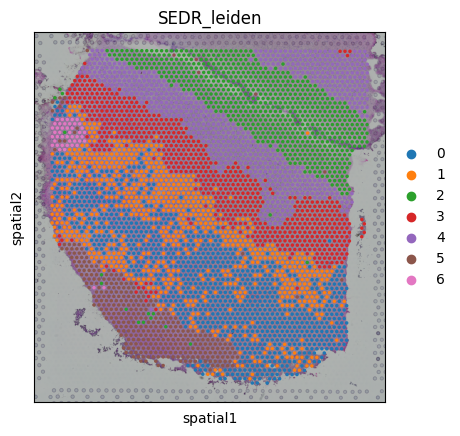

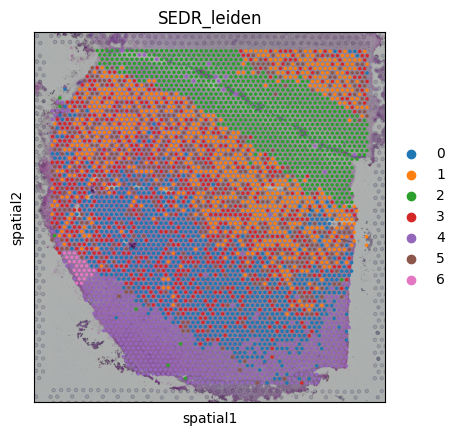

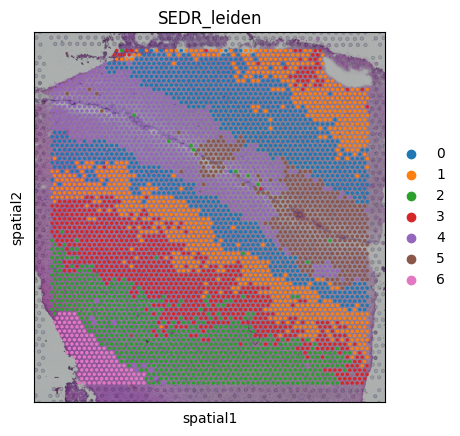

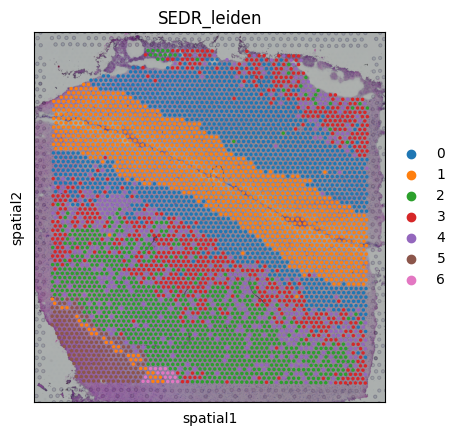

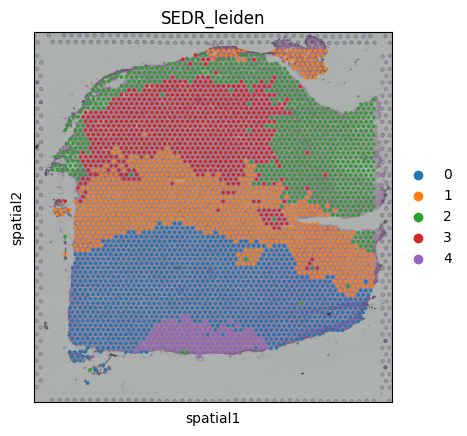

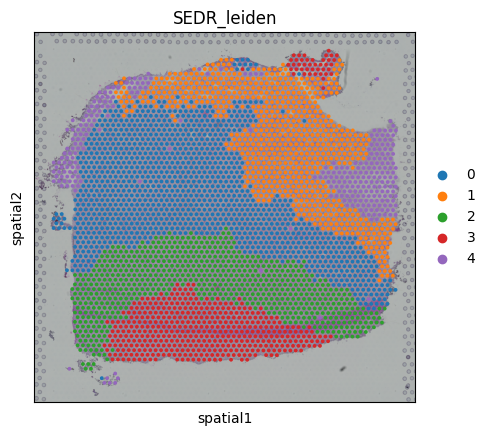

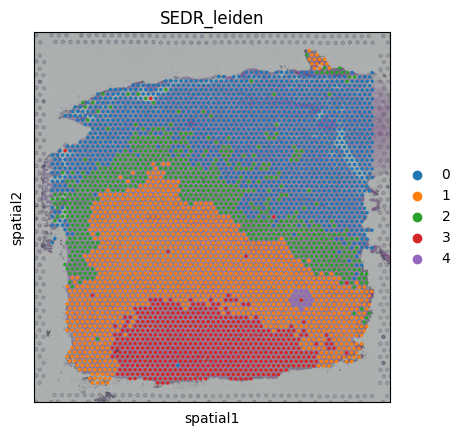

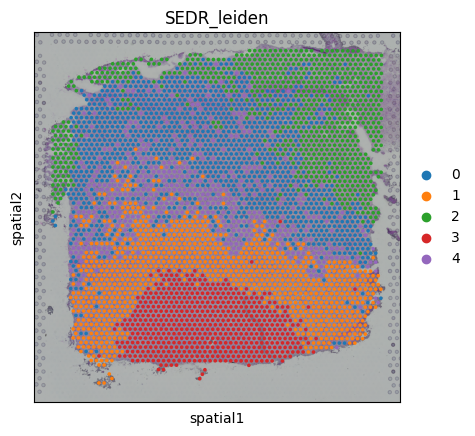

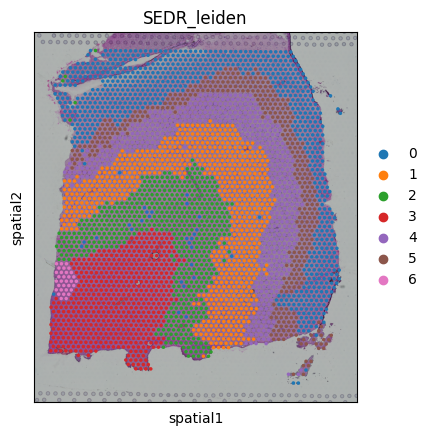

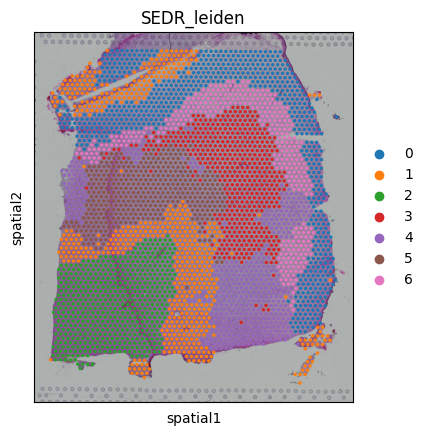

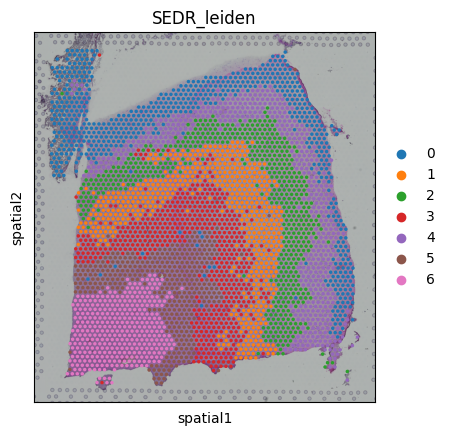

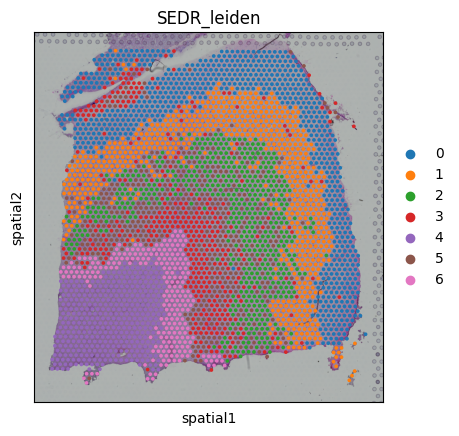

In [7]:
ARI_list = []
for proj_idx in range(len(proj_list)):
    data_name = proj_list[proj_idx]
    print('===== Project ' + str(proj_idx+1) + ' : ' + data_name)
    file_fold = f'{data_root}/{data_name}'

    # ################## Load data
    adata_h5 = load_ST_file(file_fold=file_fold)
    adata_h5.var_names_make_unique()

    adata_X = adata_preprocess(adata_h5, min_cells=5, pca_n_comps=params.cell_feat_dim)
    graph_dict = graph_construction(adata_h5.obsm['spatial'], adata_h5.shape[0], params)
    params.save_path = mk_dir(f'{save_root}/{data_name}/SEDR')

    params.cell_num = adata_h5.shape[0]
    print('==== Graph Construction Finished')

    # ################## Model training
    sedr_net = SEDR_Train(adata_X, graph_dict, params)
    if params.using_dec:
        sedr_net.train_with_dec()
    else:
        sedr_net.train_without_dec()
    sedr_feat, _, _, _ = sedr_net.process()

    np.savez(f'{params.save_path}/SEDR_result.npz', sedr_feat=sedr_feat, params=params)
    # ################## Result plot
    adata_sedr = anndata.AnnData(sedr_feat)
    adata_sedr.uns['spatial'] = adata_h5.uns['spatial']
    adata_sedr.obsm['spatial'] = adata_h5.obsm['spatial']

    sc.pp.neighbors(adata_sedr, n_neighbors=params.eval_graph_n)
    # sc.tl.umap(adata_sedr)


    if data_name in ['151669', '151670', '151671', '151672']:
        n_clusters = 5
    else:
        n_clusters = 7
    eval_resolution = res_search_fixed_clus(adata_sedr, n_clusters)

    sc.tl.leiden(adata_sedr, key_added="SEDR_leiden", resolution=eval_resolution)

    sc.pl.spatial(adata_sedr, img_key="hires", color=['SEDR_leiden'], show=False)
    plt.savefig(f'{params.save_path}/SEDR_leiden_plot.jpg', bbox_inches='tight', dpi=150)


    adata_sedr.write(f'{params.save_path}/{data_name}.h5ad')

    df_meta = pd.read_csv(f'{data_root}/{data_name}/metadata.tsv', sep='\t')
    df_meta['SEDR'] = adata_sedr.obs['SEDR_leiden'].tolist()
    df_meta.to_csv(f'{params.save_path}/metadata.tsv', sep='\t', index=False)

    # #################### evaluation
    # ---------- Load manually annotation ---------------
    df_meta = df_meta[~pd.isnull(df_meta['layer_guess'])]
    ARI = metrics.adjusted_rand_score(df_meta['layer_guess'], df_meta['SEDR'])
    print('===== Project: {} ARI score: {:.3f}'.format(data_name, ARI))
    ARI_list.append(ARI)


print('===== Project: AVG ARI score: {:.3f}'.format(np.mean(ARI_list)))